In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as pl

In [58]:
df=pd.read_csv("D:\\EDA datasets PW skills\\election2024.csv")

In [59]:
# Basic Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [60]:
# Summary Statistics for Numerical Columns
print(df.describe())

               age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072


In [61]:
# Checking Missing Values
print(df.isnull().sum())

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64


In [62]:
# Distribution of Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for id:
id
07169ed8148ce047    1
0716a8f7a98ceab4    1
0716968485ccea72    1
07167fa9264ceb65    1
07166778618ce822    1
                   ..
0716afc0a28cea87    1
07168fbd9d4ce53f    1
07167bd65a0ce094    1
07168f3957cce462    1
07168088318cef88    1
Name: count, Length: 1600, dtype: int64

Value Counts for sex:
sex
female    843
male      757
Name: count, dtype: int64

Value Counts for federal_district:
federal_district
central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: count, dtype: int64

Value Counts for type_of_city:
type_of_city
city with population of 100-500k                391
village                                         366
city with population of 1 million and higher    307
city with population of less than 50k           179
city with population of 500-950k                170
city with population of 50-100k             

In [63]:
# Handling Missing Data (Example: Dropping rows with missing job_type)
df_cleaned = df.dropna(subset=['job_type'])
df_cleaned

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
5,0716aac995cce5ae,male,27.0,southern,city with population of 1 million and higher,named correct date,not sure,Putin,does not watch,less than 4 hours a day,incomplete school education,very high,work for hire,commercial organization,refused to answer,1.127558
6,07169cf9604cee1c,male,37.0,northwestern,city with population of less than 50k,named correct date,definitely yes,Putin,once half a year,several times a week,school,very high,work for hire,commercial organization,"industry, manufacturing",0.579384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,0716ab675cccef19,male,26.0,north caucasian,village,not sure or no answer,not sure,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,work for hire,commercial organization,"industry, manufacturing",1.935815
1587,07169d47190cedc2,male,33.0,southern,city with population of 50-100k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,hard to say,work for hire,commercial organization,"transportation, storage",1.018211
1588,071654d3300ce72e,male,50.0,far eastern,city with population of less than 50k,not sure or no answer,definitely no,will not take part,does not watch,less than 4 hours a day,bachelor degree,hard to say,work for hire,commercial organization,"transportation, storage",1.183670
1590,071690e53c4cee54,female,48.0,central,city with population of 1 million and higher,named correct date,likely yes,Putin,does not watch,less than 4 hours a day,bachelor degree,hard to say,work for hire,commercial organization,"industry, manufacturing",1.530761


In [64]:
# Group by and Aggregate
print(df.groupby('candidate')['age'].mean())

candidate
Davankov              39.059701
Kharitonov            51.507937
Putin                 51.898050
Slutskiy              45.127273
spoilt vote           48.518519
struggle to answer    45.768293
will not take part    43.718750
Name: age, dtype: float64


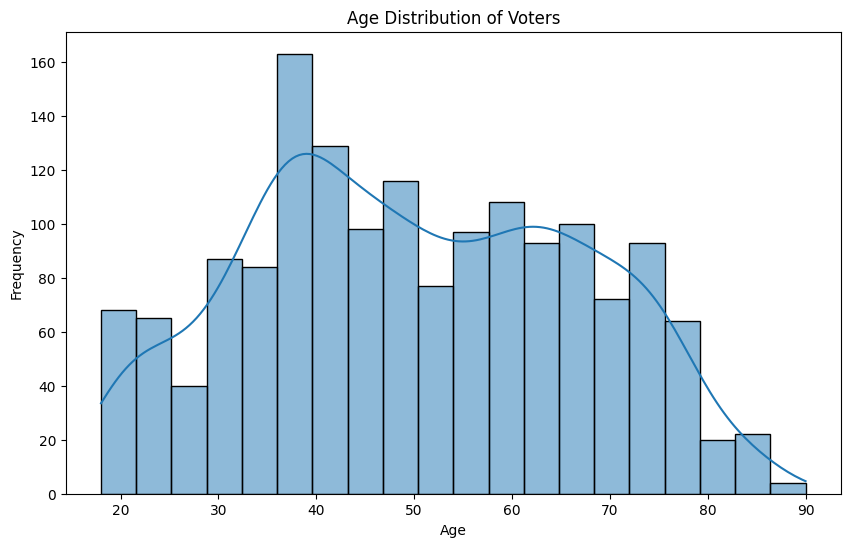

In [65]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Voters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

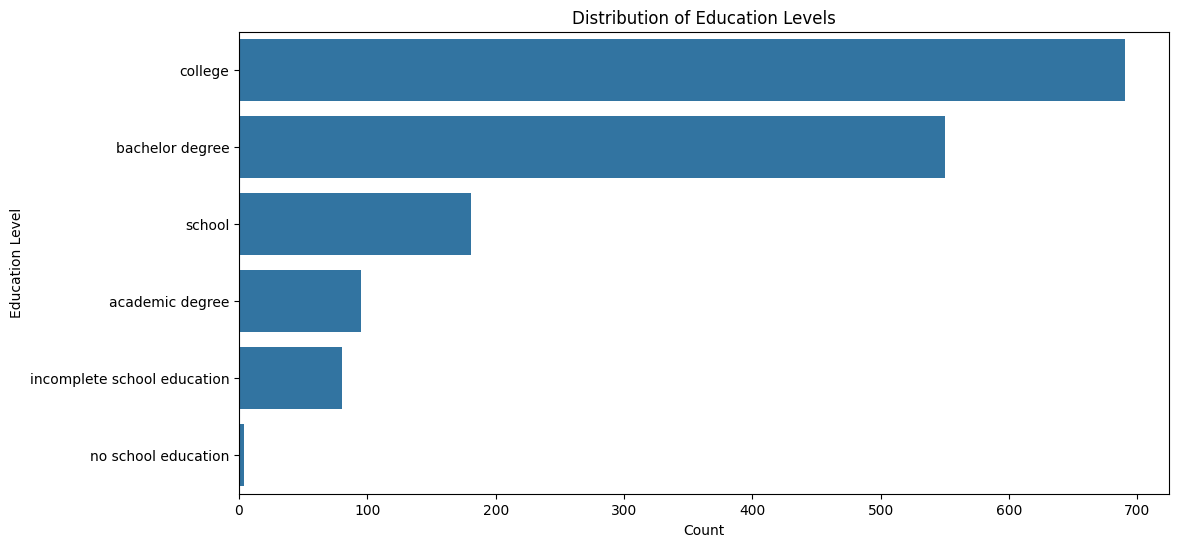

In [66]:
# Distribution of Education Levels
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

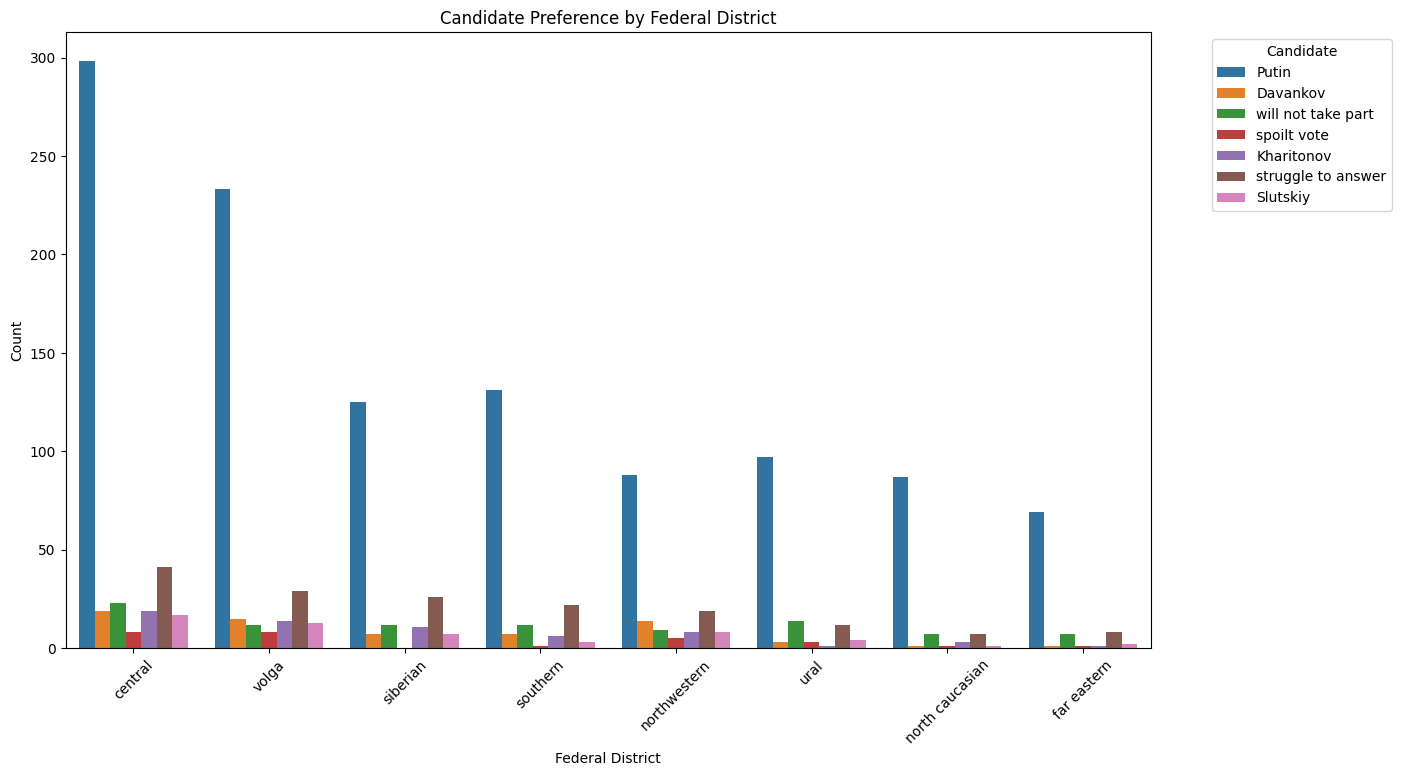

In [67]:
# Candidate Preference by Federal District
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='federal_district', hue='candidate', order=df['federal_district'].value_counts().index)
plt.title('Candidate Preference by Federal District')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


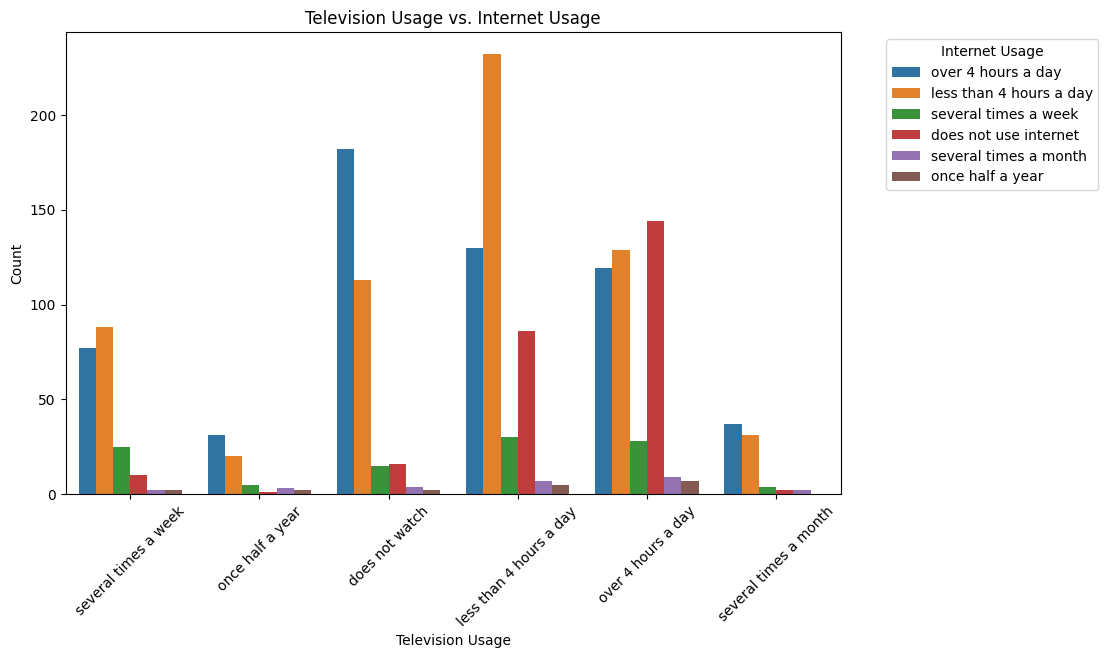

In [68]:
# Television Usage vs. Internet Usage
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='television_usage', hue='internet_usage')
plt.title('Television Usage vs. Internet Usage')
plt.xlabel('Television Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Internet Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Crosstab of Education vs. Candidate:
candidate                    Davankov  Kharitonov  Putin  Slutskiy  \
education                                                            
academic degree                     6           7     62         1   
bachelor degree                    35          23    355        22   
college                            19          22    521        23   
incomplete school education         2           3     61         4   
no school education                 0           1      0         0   
school                              5           7    129         5   

candidate                    spoilt vote  struggle to answer  \
education                                                      
academic degree                        4                  13   
bachelor degree                       15                  66   
college                                6                  56   
incomplete school education            0                   6   
no school educatio

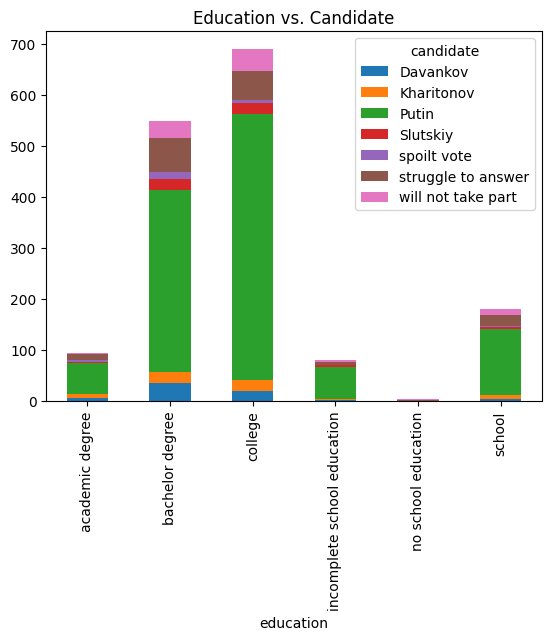

In [69]:
# Crosstab Analysis: Education vs. Candidate
crosstab = pd.crosstab(df['education'], df['candidate'], margins=True)
crosstab = crosstab.drop('All', axis=1) 
crosstab = crosstab.drop('All', axis=0)
print("Crosstab of Education vs. Candidate:")
print(crosstab)
crosstab.plot(kind = 'bar', stacked = True)
plt.title("Education vs. Candidate")
plt.show() 

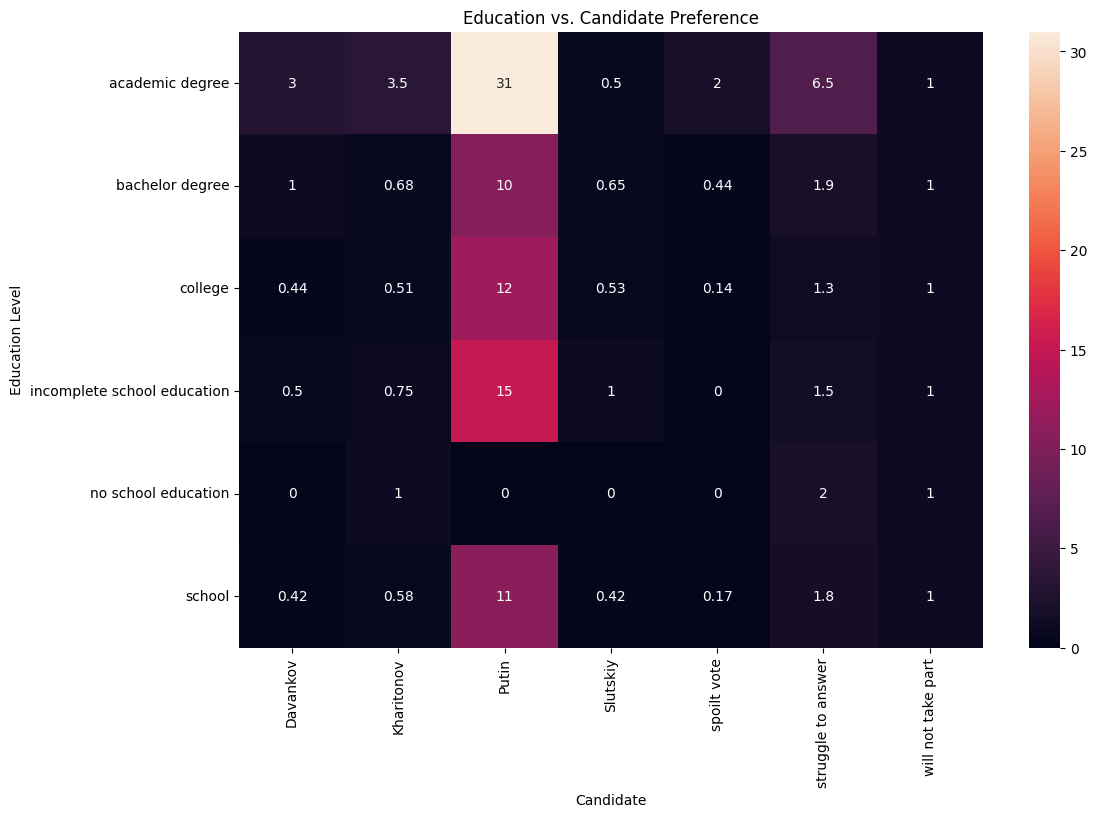

In [70]:
# Visualize the Crosstab
crosstab_normalized = crosstab.div(crosstab.iloc[:, -1], axis=0)  # Normalize by the total
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_normalized, annot=True)
plt.title('Education vs. Candidate Preference')
plt.xlabel('Candidate')
plt.ylabel('Education Level')
plt.show()

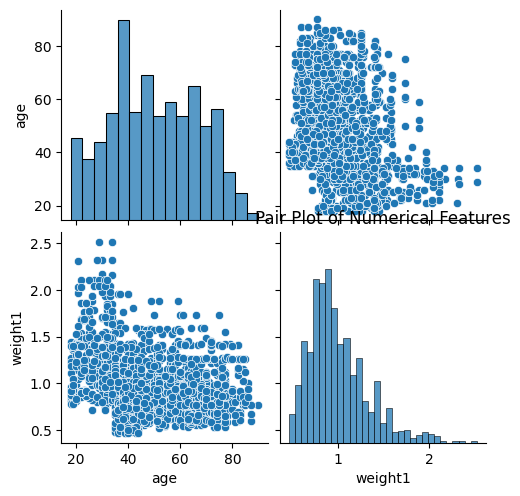

In [71]:
# Pair Plot of Numerical Features
sns.pairplot(df[['age', 'weight1']])
plt.title('Pair Plot of Numerical Features')
plt.show()

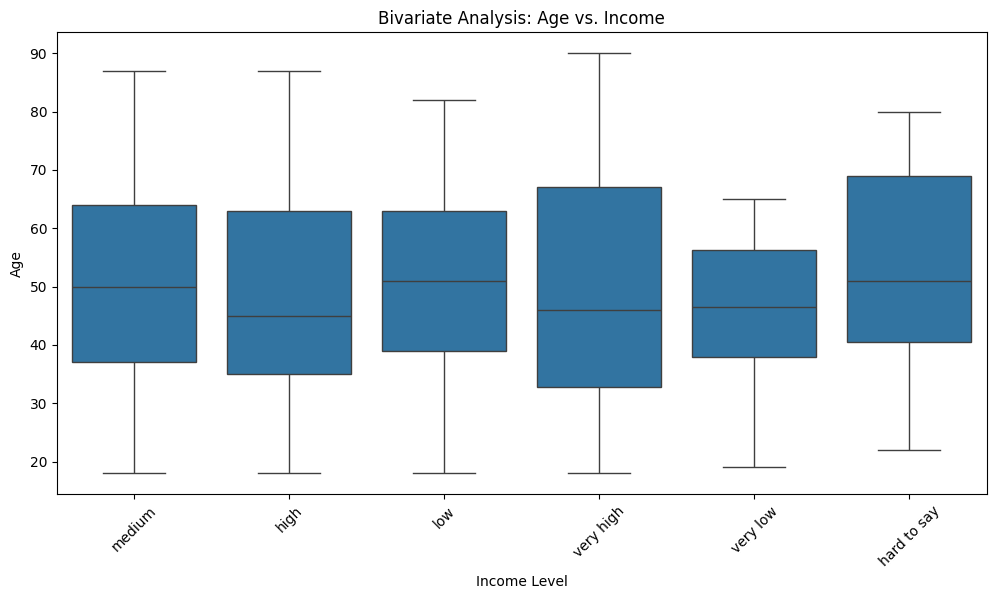

In [72]:
# Bivariate Analysis: Age vs. Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=df, order=df['income'].value_counts().index)
plt.title('Bivariate Analysis: Age vs. Income')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()